In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random

In [2]:
def resumetable(df):
    print(f'Dataset shape: {df.shape}')
    summary = pd.Frame(df.dtypes, columns=[' Type'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': 'Feature'})
    summary['Missing Values Count'] = df.isnull().sum().values
    summary['Missing Values Percentage'] = df.isnull().sum().values / len(df) * 100
    summary['Unique Values Count'] = df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Second Value'] = df.iloc[1].values
    summary['Third Value'] = df.iloc[2].values
    summary['Second to Last Value'] = df.iloc[-2].values
    summary['Last Value'] = df.iloc[-1].values
    return summary

def seed_everything(seed = 9234):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    # torch.manual_seed(seed)
    # torch.cuda.manual_seed(seed)
    # torch.backends.cudnn.deterministic = True
    # torch.backends.cudnn.benchmark = True

seed_everything()

In [7]:
data = pd.read_csv("D:\khs\온열질환자\Data\Soo_T_PATIENTS_DAILY_WHOLE_0812.csv")

In [12]:
# data = data.drop(columns=[
#     "updtDate", "instDate", "sat_x", "sat_y", "sido", "create_date",
#     "popular_man", "popular_woman", "agriculture_woman", "agriculture_man",
#     "min_ta", "max_ta", "mean_ta",
#     "grid_x", "grid_y",
#     ])

In [13]:
resumetable(data)

Dataset shape: (26010, 44)


AttributeError: module 'pandas' has no attribute 'Frame'

In [248]:
lag_cols = [
    "min_tafeel", "max_tafeel", "mean_tafeel", "gap_tafeel",
    "ta_min_six_am1", "ta_max_six_am1", "ta_mean_six_am1", "ta_min_six_am2", "ta_max_six_am2", "ta_mean_six_am2",
    "ta_min_six_pm1", "ta_max_six_pm1", "ta_mean_six_pm1", "ta_min_six_pm2", "ta_max_six_pm2", "ta_mean_six_pm2",
    "min_ws", "max_ws", "mean_ws",
]

lag_data_1 = data[lag_cols][17:-17].reset_index(drop=True)
lag_data_2 = data[lag_cols][:-34].reset_index(drop=True)
lag_data_1.columns =  ["lag1_" + col for col in lag_data_1.columns]
lag_data_2.columns =  ["lag2_" + col for col in lag_data_2.columns]

In [250]:
lag_data_2.shape, lag_data_1.shape

((25976, 19), (25976, 19))

In [251]:
from category_encoders import BinaryEncoder
be = BinaryEncoder()

sido_en = be.fit_transform(data["sido"])

In [252]:
# data = pd.concat()pd.DataFrame([sido_en, data.jenks_cluster])
new_data = pd.concat(
    [
        sido_en, data.min_tafeel, data.max_tafeel, data.mean_tafeel, data.gap_tafeel,
        data.ta_min_six_am1, data.ta_max_six_am1, data.ta_mean_six_am1, data.ta_min_six_am2, data.ta_max_six_am2, data.ta_mean_six_am2,
        data.ta_min_six_pm1, data.ta_max_six_pm1, data.ta_mean_six_pm1, data.ta_min_six_pm2, data.ta_max_six_pm2, data.ta_mean_six_pm2,
        data.min_ws, data.max_ws, data.mean_ws,
        data.jenks_cluster,
    ],
    axis=1,
)
new_data = new_data[34:].reset_index(drop=True)
new_data = pd.concat([new_data, lag_data_1], axis=1)
new_data = pd.concat([new_data, lag_data_2], axis=1)
print(new_data.shape)
new_data

(25976, 63)


,sido_0,sido_1,sido_2,sido_3,sido_4,min_tafeel,max_tafeel,mean_tafeel,gap_tafeel,ta_min_six_am1,...,lag2_ta_mean_six_am2,lag2_ta_min_six_pm1,lag2_ta_max_six_pm1,lag2_ta_mean_six_pm1,lag2_ta_min_six_pm2,lag2_ta_max_six_pm2,lag2_ta_mean_six_pm2,lag2_min_ws,lag2_max_ws,lag2_mean_ws
0,0,0,0,0,1,10.17,18.43,14.4,8.3,9.0,...,15,21,24,22,14,21,17,0.3,3.5,1.7
1,0,0,0,1,0,10.26,17.55,14.1,7.3,9.0,...,15,21,23,22,15,22,18,0.0,3.7,1.6
2,0,0,0,1,1,12.07,19.11,15.7,7.0,12.0,...,17,21,25,23,18,24,20,0.1,3.7,1.9
3,0,0,1,0,0,10.75,18.73,14.7,8.0,8.0,...,15,20,23,22,12,21,16,0.1,4.1,1.6
4,0,0,1,0,1,13.11,20.11,17.0,7.0,13.0,...,17,22,25,24,19,24,21,0.4,4.7,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,0,1,1,0,1,18.54,23.87,21.6,5.3,22.0,...,24,26,29,28,23,26,24,0.7,3.5,2.5
25972,0,1,1,1,0,18.16,24.52,21.6,6.4,15.0,...,22,24,26,25,20,24,21,0.0,1.5,0.7
25973,0,1,1,1,1,17.84,23.65,21.1,5.8,19.0,...,23,25,27,26,20,25,22,1.1,3.8,2.2
25974,1,0,0,0,0,20.86,25.05,23.1,4.2,21.0,...,25,26,30,29,21,26,23,0.0,2.9,1.4


In [254]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import optuna
from sklearn.metrics import accuracy_score

In [255]:
X = new_data.drop(columns=["jenks_cluster"])
y = new_data.jenks_cluster

seed_num = 43

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=seed_num)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.1, stratify=y_temp, random_state=seed_num)

In [256]:
X_train.shape, X_valid.shape, X_test.shape

((18702, 62), (2078, 62), (5196, 62))

In [257]:
y_train.shape, y_valid.shape, y_test.shape

((18702,), (2078,), (5196,))

In [258]:
params = {
    "n_estimators": 200,
    "max_depth": 8,
    "learning_rate": 0.01,
    "subsample": 0.8,
    "random_state": 42,
    "early_stopping_rounds": 10,
}

model = XGBClassifier(**params)
model = XGBClassifier()
model.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
)

[0]	validation_0-mlogloss:0.83692
[1]	validation_0-mlogloss:0.68612
[2]	validation_0-mlogloss:0.58990
[3]	validation_0-mlogloss:0.52572
[4]	validation_0-mlogloss:0.48190
[5]	validation_0-mlogloss:0.45135
[6]	validation_0-mlogloss:0.42901
[7]	validation_0-mlogloss:0.41245
[8]	validation_0-mlogloss:0.40004
[9]	validation_0-mlogloss:0.39152
[10]	validation_0-mlogloss:0.38457
[11]	validation_0-mlogloss:0.37847
[12]	validation_0-mlogloss:0.37433
[13]	validation_0-mlogloss:0.37035
[14]	validation_0-mlogloss:0.36763
[15]	validation_0-mlogloss:0.36574
[16]	validation_0-mlogloss:0.36460
[17]	validation_0-mlogloss:0.36234
[18]	validation_0-mlogloss:0.36122
[19]	validation_0-mlogloss:0.36045
[20]	validation_0-mlogloss:0.35946
[21]	validation_0-mlogloss:0.35829
[22]	validation_0-mlogloss:0.35788
[23]	validation_0-mlogloss:0.35802
[24]	validation_0-mlogloss:0.35768
[25]	validation_0-mlogloss:0.35749
[26]	validation_0-mlogloss:0.35733
[27]	validation_0-mlogloss:0.35734
[28]	validation_0-mlogloss:0.3

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

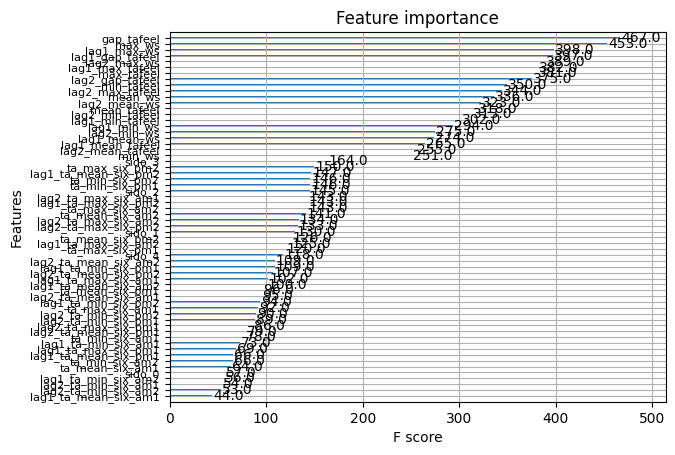

In [259]:
from xgboost import plot_importance
plot_importance(model)
# plt.figure(figsize=(24,12))
plt.yticks(fontsize=8)
plt.show()

In [260]:
model.feature_importances_

array([0.0120516 , 0.01440089, 0.02068768, 0.02128452, 0.01744647,
       0.00685184, 0.10416035, 0.00780359, 0.00657505, 0.00650998,
       0.00778225, 0.00847035, 0.00937152, 0.02495614, 0.01662167,
       0.03098479, 0.00914001, 0.2966689 , 0.00687812, 0.01379825,
       0.04584751, 0.00739855, 0.00689869, 0.00758821, 0.00936546,
       0.00828856, 0.00750471, 0.00649696, 0.00701394, 0.00714475,
       0.0062815 , 0.00839669, 0.00951625, 0.00765343, 0.0088871 ,
       0.00779054, 0.00900933, 0.00788561, 0.00822615, 0.0090988 ,
       0.00701762, 0.00691255, 0.00687793, 0.00859025, 0.00801999,
       0.00756934, 0.00671506, 0.00713218, 0.00684863, 0.00722514,
       0.00745536, 0.0068083 , 0.00833169, 0.0066122 , 0.00787879,
       0.00704317, 0.00672143, 0.00795729, 0.00772726, 0.00721411,
       0.00735032, 0.00725475], dtype=float32)

In [261]:
preds = model.predict(X_test)
preds

array([0, 0, 0, ..., 0, 0, 0])

In [262]:
from sklearn.metrics import confusion_matrix # 혼동행렬
from sklearn.metrics import accuracy_score # 정확도
from sklearn.metrics import precision_score # 정밀도
from sklearn.metrics import recall_score # 재현율
from sklearn.metrics import f1_score # f1 스코어

In [263]:
def cal_class_score(y_test, preds, type_average="macro"):
    mask_class_0 = y_test == 0
    mask_class_1 = y_test == 1
    mask_class_2 = y_test == 2
    
    results = pd.DataFrame(
        {
            "class0": cal_matrix(y_test[mask_class_0], preds[mask_class_0], type_average),
            "class1": cal_matrix(y_test[mask_class_1], preds[mask_class_1], type_average),
            "class2": cal_matrix(y_test[mask_class_2], preds[mask_class_2], type_average),
        }
    )
    results = results.T
    results.columns = ["accuracy", "precision", "recall", "F1"]
    return results

def cal_matrix(y_test, preds, type_average):
    result_class = []
    result_class.append(accuracy_score(y_test, preds))
    result_class.append(precision_score(y_test, preds, average=type_average).tolist())
    result_class.append(recall_score(y_test, preds, average=type_average).tolist())
    result_class.append(f1_score(y_test, preds, average=type_average).tolist())
    return result_class

In [264]:
test = cal_class_score(y_test, preds, type_average="macro")

d:\Dev_folder\온열환자_과제_20240923_Q\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Dev_folder\온열환자_과제_20240923_Q\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Dev_folder\온열환자_과제_20240923_Q\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [265]:
test

,accuracy,precision,recall,F1
class0,0.941825,0.333333,0.313942,0.323347
class1,0.583935,0.333333,0.194645,0.245774
class2,0.450000,0.333333,0.150000,0.206897


In [266]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds, digits=3))

              precision    recall  f1-score   support

           0      0.893     0.942     0.917      3988
           1      0.696     0.584     0.635      1108
           2      0.750     0.450     0.562       100

    accuracy                          0.856      5196
   macro avg      0.780     0.659     0.705      5196
weighted avg      0.848     0.856     0.850      5196

